
# <center> Project 2 - Credit Card Fraud Detection  <center>

<hr style="border:2px  solid black"> </hr>

### TABLE OF CONTENTS
    
1. [Importing the libraries](#lib_import)
2.[Exploring the 'Credit' Dataset](#explore-ds)
3.[Data Preparation](#data_prep)
    * [Check for null values](#null)
    *[Check for outliers](#outliers)
    *[Target variable distribution](#imb)
    *[Check the distribution of data using histograms](#hist)
    

4. [Data Modelling](#dm)
    * [Train_test_split ](#tts)
    * [Standardizing the feature and Resampling](#scal)
    * [Implementing Neural Network](#lm) :
        * [Creation of Feed forward neural Network](#esti)
        * [Instantiation of the network](#keras)
        * [Training the model](#model)

        
    
5. [Model Evaluation](#me)
    
6. [Conclusion](#cln)

7. [Overall Observation](#ob)


<hr style="border:.1px  solid  gray"> </hr>

## <CENTER> IMPORTING THE LIBRARIES<a name="lib_import"></a>

<hr style="border:01px  solid gray"> </hr>

In [1]:
#importing the libraries

import pandas as pd
import numpy as np
import seaborn as sns
import collections
from tqdm import tqdm, tqdm_notebook

# PyTorch Packages
import torch.nn as nn
from torch.autograd import Variable
from torch.autograd import Variable as V
import torch.nn.functional as F
import torch
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler

# SKLearn Packages
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler   
from sklearn.model_selection import train_test_split
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score)
from sklearn.metrics import accuracy_score, precision_score

# Plotting packages
import matplotlib.pyplot as plt
%matplotlib inline



In [2]:
#read the csv file
df = pd.read_csv('FraudDetection.csv')

In [3]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
57350,172751,2.085387,-0.033624,-1.706889,-0.015100,0.644669,-0.245303,0.125758,-0.156508,0.277994,...,0.256304,0.862281,-0.063211,0.143339,0.361885,-0.124856,-0.025472,-0.066836,2.27,0
57351,172760,-6.713826,2.369104,-3.534768,-0.368259,-1.721030,-1.322808,-0.190876,0.891149,2.068476,...,0.131247,0.994246,-0.002140,-0.072979,-0.167159,-0.387271,-2.616341,0.474584,19.59,0
57352,172768,-2.076175,2.142238,-2.522704,-1.888063,1.982785,3.732950,-1.217430,-0.536644,0.272867,...,2.016666,-1.588269,0.588482,0.632444,-0.201064,0.199251,0.438657,0.172923,8.95,0
57353,172770,2.007418,-0.280235,-0.208113,0.335261,-0.715798,-0.751373,-0.458972,-0.140140,0.959971,...,-0.208260,-0.430347,0.416765,0.064819,-0.608337,0.268436,-0.028069,-0.041367,3.99,0
57354,172777,-1.266580,-0.400461,0.956221,-0.723919,1.531993,-1.788600,0.314741,0.004704,0.013857,...,-0.157831,-0.883365,0.088485,-0.076790,-0.095833,0.132720,-0.028468,0.126494,0.89,0


<hr style="border:01px  solid gray"> </hr>

## <center>EXPLORING THE CREDITCARD DATASET<a name="explore-ds"></a>
    

<hr style="border:01px  solid gray"> </hr>

Here, we would be exploring the dataset in general, like the below: 

* Shape, column names and size of the dataset
* Unique values of target variable. 
* Descirptive statistics.
* Datatype and overview . 
* Count of values of each feature and the target variable.

In [4]:
#get the shape of the ds
df.shape


(57355, 31)

In [5]:
#get the descriptive stats of the ds
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,...,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000
mean,94577.357074,-0.029092,0.030156,-0.055749,0.035521,-0.022664,-0.006869,-0.032448,0.006142,-0.017667,...,0.005569,-0.000265,0.003273,0.001159,0.005003,0.003133,0.000226,-0.000625,88.825575,0.008578
std,47505.713234,2.061391,1.711228,1.733364,1.484621,1.508300,1.361819,1.504317,1.334058,1.131679,...,0.813950,0.734597,0.625238,0.604653,0.519852,0.482496,0.433713,0.323980,279.496913,0.092221
min,2.000000,-36.802320,-63.344698,-48.325589,-5.519697,-113.743307,-19.996349,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-32.828995,-2.822384,-8.696627,-2.534330,-8.878665,-15.430084,0.000000,0.000000
25%,53943.500000,-0.927615,-0.588747,-0.922554,-0.839400,-0.692157,-0.774796,-0.558211,-0.207145,-0.651869,...,-0.226932,-0.541278,-0.161812,-0.354648,-0.312164,-0.322536,-0.070642,-0.052695,5.475000,0.000000
50%,84641.000000,0.015980,0.071801,0.168619,-0.005637,-0.055913,-0.276163,0.035797,0.024380,-0.053373,...,-0.028379,0.004681,-0.011439,0.041286,0.021494,-0.049135,0.000859,0.011169,21.990000,0.000000
75%,139140.000000,1.314129,0.815413,1.019384,0.764271,0.607021,0.387408,0.562758,0.333358,0.599522,...,0.190245,0.529286,0.147282,0.439244,0.352590,0.243882,0.091355,0.078500,76.900000,0.000000
max,172777.000000,2.454930,22.057729,3.940337,16.715537,28.762671,73.301626,120.589494,20.007208,10.348407,...,27.202839,10.503090,22.528412,4.584549,5.826159,3.517346,31.612198,15.866721,25691.160000,1.000000


In [6]:
#get the ds info on dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57355 entries, 0 to 57354
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    57355 non-null  int64  
 1   V1      57355 non-null  float64
 2   V2      57355 non-null  float64
 3   V3      57355 non-null  float64
 4   V4      57355 non-null  float64
 5   V5      57355 non-null  float64
 6   V6      57355 non-null  float64
 7   V7      57355 non-null  float64
 8   V8      57355 non-null  float64
 9   V9      57355 non-null  float64
 10  V10     57355 non-null  float64
 11  V11     57355 non-null  float64
 12  V12     57355 non-null  float64
 13  V13     57355 non-null  float64
 14  V14     57355 non-null  float64
 15  V15     57355 non-null  float64
 16  V16     57355 non-null  float64
 17  V17     57355 non-null  float64
 18  V18     57355 non-null  float64
 19  V19     57355 non-null  float64
 20  V20     57355 non-null  float64
 21  V21     57355 non-null  float64
 22

In [7]:
#get the unique value of the target label 'quality' 
print( "Unique values in target variable 'Class'are :" , df.Class.unique())

Unique values in target variable 'Class'are : [0 1]


In [8]:
#get the column names
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

***

**OBSERVATION**

* From the above cells, we infer that the credit card dataset has 57355 rows with 31 columns. 
* In `cell 4`, the shape is retreived.
* The datatype is obtained from the `info()` keyword, which states they are numeric values(Independent features are Float and the dependent feature is integer).
* In `cell 6`, `describe()` , shows the descriptive statistics of the data set. It is evident that the value of column Time and Amount are not in range with respect to the other columns. 
* Also, in `cell 7` , we check for the unique values present in the target variable `Class`. 
* `Cell 8`, the column names are retrieved.
***

<hr style="border:01px  solid gray"> </hr>

## <center>DATA PREPARATION <a name="data_prep"></a>

<hr style="border:01px  solid gray"> </hr>


In this section, we will be performing data preparation steps like the below: 
1. [Check for null values](#null)
2. [Check for outliers](#outliers)
3. [Implement Correlation heatmap](#heatmap)
4. [Check for target variable distribution](#imb)
5. [Check the distribution of data using histograms](#hist)


***

### 1. Check for NULL , Nan and missing values : <a name="null"></a>

In [9]:
#check for null values
df.isnull().sum().any()

False

In [10]:
#check for Nan values
df.isna().sum().any()

False

In [11]:
#duplicate values and Nan are checked for :
print("\nCHECK FOR DUPLICATE VALUES:\n",df.duplicated().value_counts())
print()
print()
print("GET THE DUPLICATE VALUE:\n", df[df.duplicated(keep=False)])


CHECK FOR DUPLICATE VALUES:
 False    57262
True        93
dtype: int64


GET THE DUPLICATE VALUE:
          Time        V1        V2        V3        V4        V5        V6  \
397      1548 -1.559446  1.425546  0.812589 -1.129381  0.507528  0.183507   
398      1548 -1.559446  1.425546  0.812589 -1.129381  0.507528  0.183507   
2833    24646  1.100828  0.115819  1.539031  1.643405 -0.753781  0.227847   
2834    24646  1.100828  0.115819  1.539031  1.643405 -0.753781  0.227847   
3659    29058  1.076018 -0.126284  1.320255  1.154681 -0.892714  0.356662   
...       ...       ...       ...       ...       ...       ...       ...   
54080  163152 -1.196037  1.585949  2.883976  3.378471  1.511706  3.717077   
54081  163152 -1.196037  1.585949  2.883976  3.378471  1.511706  3.717077   
55834  167397 -3.665041  1.485038 -2.453237 -0.573034  0.451813 -0.193622   
55835  167397 -3.665041  1.485038 -2.453237 -0.573034  0.451813 -0.193622   
55836  167397 -3.665041  1.485038 -2.453237 -0.57303

In [12]:
#check duplicate and remove if found
print("\n\nSHAPE BEFORE ELIMINATING DUPLICATE VALUES:" , df.shape)
df.drop_duplicates(inplace = True)
print("\nSHAPE AFTER ELIMINATING DUPLICATE VALUES:" , df.shape)



SHAPE BEFORE ELIMINATING DUPLICATE VALUES: (57355, 31)

SHAPE AFTER ELIMINATING DUPLICATE VALUES: (57262, 31)


***

<b>OBSERVATION:</b> 

* The above cells shows there is no missing value and no Nan, in the dataset indicating it's a clean dataset. 
But when checked for duplicates, we find about 93 duplicate values are present. In `cell 11`, bool value `False = 57262`is  returned.
* In `Cell 12`, the dupliacte values are removed and the **new shape after deletion is 57262 rows.** 

***

###  2. Check for Outliers : <a name="outliers"></a>

In [13]:
#outlier detection


from collections import Counter 
features = df.columns.values.tolist()
features.remove("Class")

outlier_index = list()

for feature in features:
    
    q1 = np.percentile(df[feature], 25)
    q3 = np.percentile(df[feature], 75)
    
    iqr = q3 - q1
    
    step = iqr * 1.5
    
    lower_bound = q1 - step
    upper_bound = q3 + step
    
# List of indices where the attribute value lies outside the bounds
feature_outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)].index
outlier_index.extend(feature_outliers)
outlier_index = Counter(outlier_index) 

In [14]:
outlier_list = [index for index, count in outlier_index.items() if count > 0]

print(f"Found {len(outlier_list)} outliers in the entire dataset.")

Found 6391 outliers in the entire dataset.


In [15]:
df = df.drop(outlier_list, axis=0).reset_index(drop=True)
df.shape

(50871, 31)

***

<b>OBSERVATION:</b>

* In this section, outlier check is done in the 25th ,75th percentile boundary. 
* Cell 14, shows 6391 outliers are present above the range 0. 
* The shape is 50871 after outlier removal.
* We decide to remove the outliers as our dataset is large. Also, since in realtime precise classification is to be made. 

***

### 3. Check for distribution of the target variable 'Class' : 
<a name="imb"></a>

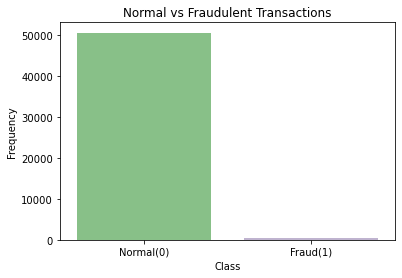

In [16]:
# To check for class imabalance distribution in target variable'Class'
labels = ["Normal(0)", "Fraud(1)"]
sns.countplot(x ='Class' , data = df, palette = "Accent")
plt.title("Normal vs Fraudulent Transactions")
plt.xticks(range(2), labels)
plt.xlabel("Class")
plt.ylabel("Frequency");

In [17]:
df['Class'].value_counts()

0    50485
1      386
Name: Class, dtype: int64

***
<b>OBSERVATION:</b>

1. We have used a `countplot`, to depict the variations in the target variable. 
    * We observe that the dirstibution is more concentrated in `Class 0`.
    * It is imablanced.
2. Next, to view the class imbalance, `countplot` is used.
    * Also, the unique `value_counts()` are got in `cell 17`, to get the exact values. 
    * We can say,maximum value is present in `Class==0` which is 50485 and the least in `Class==1` which has 386 values.
    
NOTE : Since the target variable is highly imbalanced , sampling is vital for prediction.


### 4. Histogram Plots:

<a name="hist"></a>

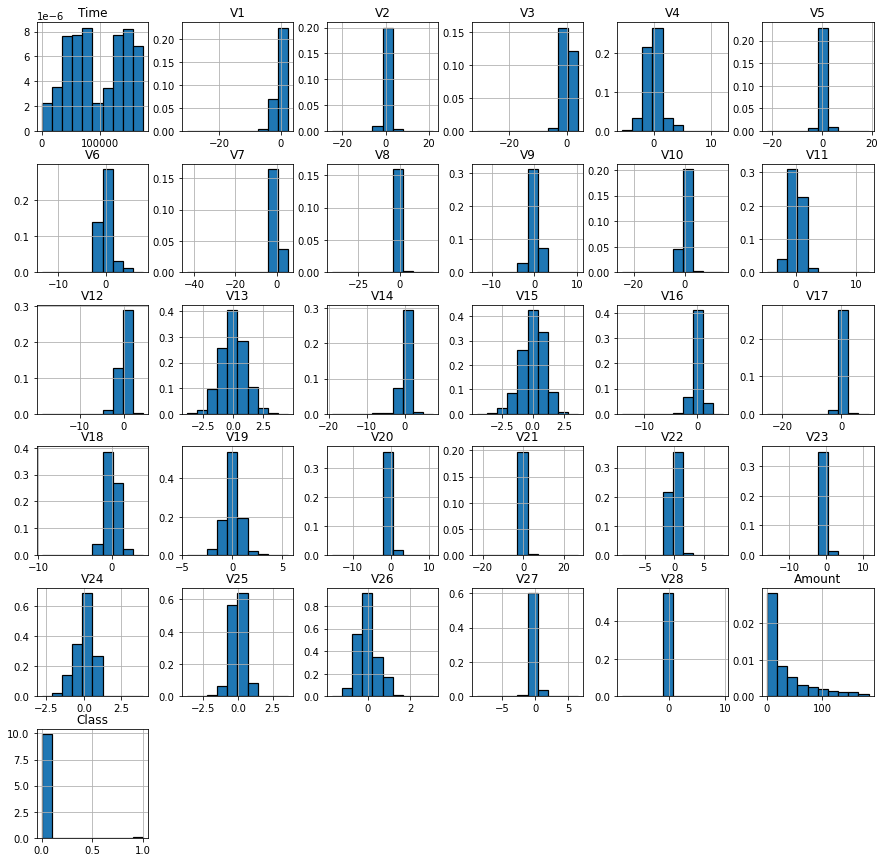

In [18]:
#histogram plotting using pandas

df.hist(edgecolor='black', linewidth=1.2 , density = True)
fig=plt.gcf()
fig.set_size_inches(15,15)
plt.show()

***

<b>OBSERVATION:</b>

From the above histogram, 
* We can infer that, most of the features are evenly distributed except `Time` and `Amount`. 
* `Amount` exhibits highest right skewness, from `cell 18`
* `Time` shows a bimodal distribution.
* Other distribution seems to be categorical and with normal distribution

<u>**NOTE**</u> Transforming the features would be mandatory to bring them in range prior prediction because of uneven distribution.



***

<hr style="border:01px  solid gray"> </hr>

## <center>DATA MODELLING<a name="dm"></a>

<hr style="border:01px  solid gray"> </hr>


1. [Train_test_split](#scal)
2. [Standardizing the feature](#tts)
3. [Implementing Neural Netwrok](#lm) :
    * [a. Creation of Feed forward neural Network](#esti)
    * [b. Instantiation of the network](#keras)
    * [c. Training the model](#model)

### 1. Train_test_split : <a name="tts"></a>

In [19]:
df['Time'] = df['Time'].apply(lambda x: np.ceil(float(x)/3600) % 24.)
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [20]:
# Split into train+val and test
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=69)

# Split train into train-val
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.1, stratify=y_trainval, random_state=21)

***

<b>OBSERVATION:</b>


* In `cell 19` , Time is normalized as it is in seocnds in the raw datset. Therefore , it is converted to a 24hr format using lambda function.
* Also, columns are split to Features and labels for predction. 
* The dataset is split into 80 :20 ratio in `cell 20`. Also, since class imbalance exists, we use `stratify = y` . 
* Train set has 40697 samples which is 80% of the total (50871 samples) and test set has 10174 samples.

<u>**NOTE**</u> Transforming the features would be mandatory to bring them in range prior prediction because of uneven distribution.



***

 ### 2. Standardizing the feature and resampling: <a name="scal"></a>

In [21]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)
X_train, y_train = np.array(X_train), np.array(y_train)
X_val, y_val = np.array(X_val), np.array(y_val)
X_test, y_test = np.array(X_test), np.array(y_test)

In [22]:
#function call creation

def get_class_distribution(obj):
    count_dict = {
        "Normal": 0,
        "Fraud": 0,
    
    }
    
    for i in obj:
        if i == 0: 
            count_dict['Normal'] += 1
        elif i == 1: 
            count_dict['Fraud'] += 1
                 
        else:
            print("Check classes.")
            
    return count_dict

class ClassifierDataset(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)


train_dataset = ClassifierDataset(torch.from_numpy(X_train).float(), torch.from_numpy(y_train).long())
val_dataset = ClassifierDataset(torch.from_numpy(X_val).float(), torch.from_numpy(y_val).long())
test_dataset = ClassifierDataset(torch.from_numpy(X_test).float(), torch.from_numpy(y_test).long())

In [23]:
target_list = []
for _, t in train_dataset:
    target_list.append(t)
    
target_list = torch.tensor(target_list)
target_list = target_list[torch.randperm(len(target_list))]

In [24]:
class_count = [i for i in get_class_distribution(y_train).values()]
class_weights = 1./torch.tensor(class_count, dtype=torch.float) 
print(class_weights)

tensor([2.7512e-05, 3.5971e-03])


In [25]:
class_weights_all = class_weights[target_list]


In [26]:
weighted_sampler = WeightedRandomSampler(
    weights=class_weights_all,
    num_samples=len(class_weights_all),
    replacement=True
)

In [27]:
EPOCHS = 10
BATCH_SIZE = 7200
NUM_FEATURES = len(X.columns)
NUM_CLASSES = 2
LEARNING_RATE = 0.0001

In [28]:
train_loader = DataLoader(dataset=train_dataset,
                          batch_size=BATCH_SIZE,
                          sampler=weighted_sampler
)
val_loader = DataLoader(dataset=val_dataset, batch_size=1)
test_loader = DataLoader(dataset=test_dataset, batch_size=1)

***

<b>OBSERVATION:</b>


* * In `cell 21` MinMaxScaler is applied and values are reshaped. SInce amount is used, we don't use standard scaler as currency doens't come innegative values. 
    * `cell 21` shows the valus after scaling
* In `cell 26`, weightedRandomSampler is used to balance the data class. it is passed with `replacement =TRue` which means samples are drawn withreplacement. 
* In `cell 27` , the important parametrs like epoch , batch_size are passed with the below values

`EPOCHS = 10
BATCH_SIZE = 7200
NUM_FEATURES = len(X.columns)
NUM_CLASSES = 2
LEARNING_RATE = 0.0001`

* In `cell 28`, the sampled dataset is loaded using Dataloader.

***

### 3. Implementing Neural Network: <a name="lm"></a>

###  a. Create the Feed Forward Neural Network <a name="esti"></a>

In [29]:
#creating the module
class Net1(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin1 = nn.Linear(30,512)
        self.lin2 = nn.Linear(512,128)
        self.lin7 = nn.Linear(128,64)
        self.lin8 = nn.Linear(64,NUM_CLASSES)

        self.drop2 = nn.Dropout(0.05)

        self.lin1.weight.data.uniform_(-2,2)
        self.lin2.weight.data.uniform_(-2,2)
        self.lin7.weight.data.uniform_(-2,2)
        self.lin8.weight.data.uniform_(-2,2)

    def forward(self, data):
        x = torch.tanh(self.lin1(data))
        x = self.drop2(torch.tanh(self.lin2(x)))
        x = torch.tanh(self.lin7(x))
        x = self.lin8(x)

        return (x)

###  b. Instantiate the network, the loss function and the optimizer <a name="keras"></a>

In [30]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [31]:
#Instantiation
model = Net1()
#criterion = nn.CrossEntropyLoss()
criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)
print(model)


Net1(
  (lin1): Linear(in_features=30, out_features=512, bias=True)
  (lin2): Linear(in_features=512, out_features=128, bias=True)
  (lin7): Linear(in_features=128, out_features=64, bias=True)
  (lin8): Linear(in_features=64, out_features=2, bias=True)
  (drop2): Dropout(p=0.05, inplace=False)
)


###  c. Train the network <a name="model"></a>

In [32]:
def multi_acc(y_pred, y_test):
    y_pred_softmax = torch.log_softmax(y_pred, dim = 1)
    _, y_pred_tags = torch.max(y_pred_softmax, dim = 1)    
    
    correct_pred = (y_pred_tags == y_test).float()
    acc = correct_pred.sum() / len(correct_pred)
    
    acc = torch.round(acc * 100)
    
    return acc

In [33]:
accuracy_stats = {
    'train': [],
    "val": []
}
loss_stats = {
    'train': [],
    "val": []
}

In [34]:
print("Begin training.")
for e in tqdm(range(1, EPOCHS+1)):
    
    # TRAINING
    train_epoch_loss = 0
    train_epoch_acc = 0
    model.train()
    for X_train_batch, y_train_batch in train_loader:
        # get the inputs
        X_train_batch, y_train_batch = X_train_batch, y_train_batch
        
        #gpu code
        #X_train_batch, y_train_batch = X_train_batch.to(device), y_train_batch.to(device)
        
        # zero the parameter gradients
        optimizer.zero_grad()
        
        # forward + backward + optimize
        y_train_pred = model(X_train_batch)
        train_loss = criterion(y_train_pred, y_train_batch)
        train_acc = multi_acc(y_train_pred, y_train_batch)
        train_loss.backward()
        optimizer.step()
        
        train_epoch_loss += train_loss.item()
        train_epoch_acc += train_acc.item()
        
        
    # VALIDATION    
    with torch.no_grad():
        
        val_epoch_loss = 0
        val_epoch_acc = 0
        
        model.eval()
        for X_val_batch, y_val_batch in val_loader:
            # get the inputs
            X_val_batch, y_val_batch = X_val_batch, y_val_batch
            
            #gpu code
            #X_val_batch, y_val_batch = X_val_batch.to(device), y_val_batch.to(device)
            
            y_val_pred = model(X_val_batch)
                        
            val_loss = criterion(y_val_pred, y_val_batch)
            val_acc = multi_acc(y_val_pred, y_val_batch)
            
            val_epoch_loss += val_loss.item()
            val_epoch_acc += val_acc.item()
    loss_stats['train'].append(train_epoch_loss/len(train_loader))
    loss_stats['val'].append(val_epoch_loss/len(val_loader))
    accuracy_stats['train'].append(train_epoch_acc/len(train_loader))
    accuracy_stats['val'].append(val_epoch_acc/len(val_loader))
                              
    # print statistics
    print(f'Epoch {e+0:03}: | Train Loss: {train_epoch_loss/len(train_loader):.5f} | Val Loss: {val_epoch_loss/len(val_loader):.5f} | Train Acc: {train_epoch_acc/len(train_loader):.3f}| Val Acc: {val_epoch_acc/len(val_loader):.3f}')

  0%|          | 0/10 [00:00<?, ?it/s]

Begin training.


 10%|█         | 1/10 [00:05<00:48,  5.43s/it]

Epoch 001: | Train Loss: 11.47217 | Val Loss: 9.97368 | Train Acc: 11.500| Val Acc: 10.614


 20%|██        | 2/10 [00:10<00:39,  4.96s/it]

Epoch 002: | Train Loss: 8.87909 | Val Loss: 7.33200 | Train Acc: 17.833| Val Acc: 19.484


 30%|███       | 3/10 [00:15<00:37,  5.29s/it]

Epoch 003: | Train Loss: 6.67488 | Val Loss: 5.08726 | Train Acc: 27.500| Val Acc: 31.204


 40%|████      | 4/10 [00:21<00:31,  5.29s/it]

Epoch 004: | Train Loss: 4.75980 | Val Loss: 3.37490 | Train Acc: 38.833| Val Acc: 45.430


 50%|█████     | 5/10 [00:25<00:25,  5.10s/it]

Epoch 005: | Train Loss: 3.44729 | Val Loss: 2.17553 | Train Acc: 49.667| Val Acc: 58.673


 60%|██████    | 6/10 [00:31<00:20,  5.16s/it]

Epoch 006: | Train Loss: 2.44835 | Val Loss: 1.43064 | Train Acc: 59.833| Val Acc: 69.509


 70%|███████   | 7/10 [00:36<00:15,  5.26s/it]

Epoch 007: | Train Loss: 1.69552 | Val Loss: 0.96857 | Train Acc: 68.833| Val Acc: 77.666


 80%|████████  | 8/10 [00:40<00:09,  4.84s/it]

Epoch 008: | Train Loss: 1.29852 | Val Loss: 0.67395 | Train Acc: 75.333| Val Acc: 84.103


 90%|█████████ | 9/10 [00:45<00:04,  4.75s/it]

Epoch 009: | Train Loss: 0.93757 | Val Loss: 0.50112 | Train Acc: 80.833| Val Acc: 88.280


100%|██████████| 10/10 [00:49<00:00,  4.97s/it]

Epoch 010: | Train Loss: 0.74689 | Val Loss: 0.39364 | Train Acc: 84.833| Val Acc: 91.253


*** 
**OBSERVATION:**

a. In `cell 29`, a feed forward neural netwrok is created with  4 fully connceted layers with 30 as input size followed by neuron size of 512,128,64 with a linear activation function. 
    * Also , to avoid overfitting, dropout with a threshold of 0.05 is passed.  
    
 
b. In `cell 31` , we can say that network instantiation with  `CrossEntropy ` loss funtion for binary class classification , `ADAM` optimization  and learning rate of 0.001 is used.

c.In `cell 34`, we train the network and print the validation loss and accuray along with training loss and accuarcy.
 * we can infer that training loss dropped to 0.74 from 11 and validaion loss from 9.9 to 0.3. 
 * SImilary , in terms of accuracy , we can say that with increase in each epoch , training accuracy improved starting from just 11% to 84.83% and Validation accuracy from 10% to 91.25%.
 

    
**NOTE** NN using pytorch has given good results. as it is a high level api , and is suited for this large dataset and is capable of doing high computational. 
***

<hr style="border:01px  solid gray"> </hr>

## <center>MODEL EVALUATION <a name="me"></a>

<hr style="border:01px  solid gray"> </hr>

Text(0.5, 1.0, 'Train-Val Loss/Epoch')

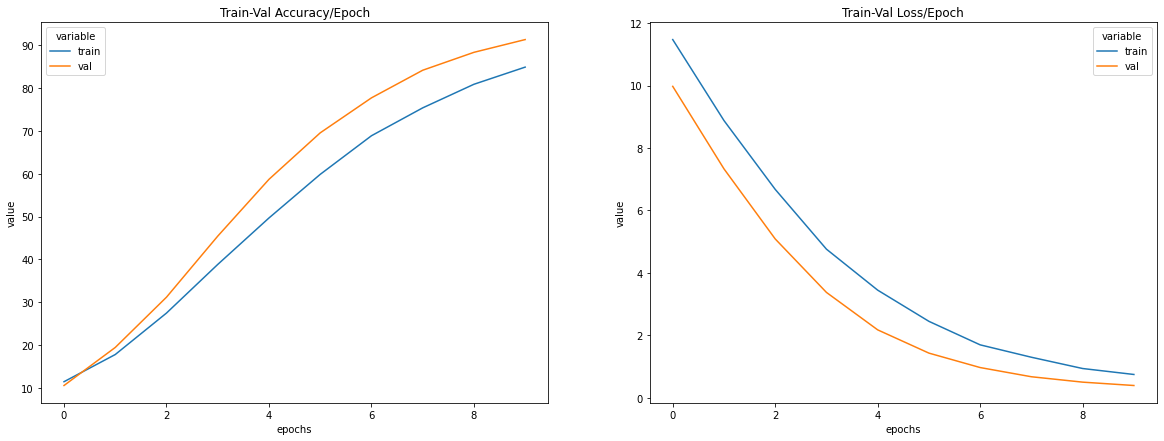

In [35]:
#model evaluation on train and test set
# Create dataframes
train_val_acc_df = pd.DataFrame.from_dict(accuracy_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})
train_val_loss_df = pd.DataFrame.from_dict(loss_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})

# Plot the dataframes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,7))
sns.lineplot(data=train_val_acc_df, x = "epochs", y="value", hue="variable",  ax=axes[0]).set_title('Train-Val Accuracy/Epoch')
sns.lineplot(data=train_val_loss_df, x = "epochs", y="value", hue="variable", ax=axes[1]).set_title('Train-Val Loss/Epoch')

In [36]:
y_pred_list = []
with torch.no_grad():
    model.eval()
    for X_batch, _ in test_loader:
        #gpu code
        #X_batch = X_batch.to(device)
        y_test_pred = model(X_batch)
        _, y_pred_tags = torch.max(y_test_pred, dim = 1)
        y_pred_list.append(y_pred_tags.numpy())
        #y_pred_list.append(y_pred_tags.cpu().numpy())
y_pred_list = [a.squeeze().tolist() for a in y_pred_list]

In [37]:
class2idx = {
    0:0,
    1:1,
    
}

idx2class = {v: k for k, v in class2idx.items()}

df['Class'].replace(class2idx, inplace=True)

In [39]:
print(classification_report(y_test, y_pred_list))


              precision    recall  f1-score   support

           0       0.99      0.90      0.95     10098
           1       0.02      0.22      0.03        77

    accuracy                           0.90     10175
   macro avg       0.51      0.56      0.49     10175
weighted avg       0.99      0.90      0.94     10175



***

<b>OBSERVATION:</b>

From the above model evaluation, 
* In accuracy graph , we can depict that our model isn't overfitting as it  doesn't diverge . It is at par with each other in the same direction.
* The loss graph infers the same where initially it can be seen that both taining and validationloss are more and gradually decreases with increase in each epoch. 
* Accuracy, from 10% to 90% was acheived in test data. 
* We infer that it performs the best in classifying fradulent cards.
* Classification report shows the accuracy of 90%. 
* However, the F1 score to be able to classify fraudulent cases is very less. 
* All the features are considered here.




<hr style="border:01px  solid gray"> </hr>

## <center>CONCLUSION<a name="cln"></a>

<hr style="border:01px  solid gray"> </hr>

* From the above implementation and evalutaion, we can say for this particular model of classifying credit cards with  **Feed forward neural network** considering all the features, 
        * the maximum accuracy achieved was 91%.
        * It is well suited for this dataset as it has 50k + records. 
        * It is capable of doing high computational work. 
        * The loss score achieved is 0.3.Thus indicating a super fit model. 
        * The loss decreases and accuracy increases. 
        * Regularization played a major role in boosting the performance.


* Model can be improved further by hyper parameter tuning and  cross  validation. Also, different deep learning models could be implemented. Variations can be checked for and compared.
* Additionally, features selection can be done to improve perfomance.Since , the column names are hidden and we are not sure about the fields, we have considered all the columns. 
* Also, other sampling methods can be tried on to boost the results . 


<hr style="border:.03px  solid black"> </hr> <a name="ob"></a>
<hr style="border:.03px  solid black"> </hr> <a name="ob"></a>

# <center>OVERALL OBSERVATION</b></center>

**1. With respect to data pre-processing:** 
* Outlier removal played a major role in classifying. 
* Datastet columns are named with V1 and so on upto V28 due to privacy reasons. Hence, We have considered all the features in this model without ignoring any column. 


**2. With respect to initializing the model and compiling them:**
* Since binary class classification problem : 
    - output layer = hyperbolic tangent tanH
    - loss function = crossentropy 
    -  With epoch with 5 , model loss was more accounting to 6.5 . Also with less batch_size input, model performed poorer giving an accuracy of 85% and high loss of 6.5. 
    - Optimizer = Adam gave good results . 

**3.With respect to regularization techniques:**
* With "dropout" regularization technique, the loss value decreased and accuracy increased , as neurons are dropped at random     in the training phase during each iteration which helped in achieving pretty good results. 

**4. With respect to train_test_split:**
* 70:30 ratio split, produced an accuracy of 70% . 
* 80:20 produced 91%. 
